In [114]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # 2번쨰 열 = petal length, 3번째열 petal width
y = (iris.target ==0).astype(np.int)

In [115]:
per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[1.4,0.5]])

In [116]:
y_pred

array([1])

In [117]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.5.0'

In [118]:
keras.__version__

'2.5.0'

In [119]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [120]:
X_train_full.shape

(60000, 28, 28)

In [121]:
X_train_full.dtype

dtype('uint8')

In [122]:
# 5000개까지 dataset을 valid set으로 만들고 255로 나눔, 5000개부터 dataset은 train set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [123]:
class_names = ["T_shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [124]:
class_names[y_train[0]]

'Coat'

In [125]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [126]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_39 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.layers
hidden1 = model.layers[1]
hidden1.name

'dense_38'

In [128]:
weights, biases = hidden1.get_weights()
weights.shape
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [129]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [130]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7143 - accuracy: 0.7636 - val_loss: 0.5131 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4845 - accuracy: 0.8314 - val_loss: 0.4395 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4385 - accuracy: 0.8456 - val_loss: 0.4321 - val_accuracy: 0.8456
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4105 - accuracy: 0.8555 - val_loss: 0.4019 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3900 - accuracy: 0.8630 - val_loss: 0.3803 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3750 - accuracy: 0.8673 - val_loss: 0.3916 - val_accuracy: 0.8604
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3598 - accuracy: 0.8722 - val_loss: 0.3878 - val_accuracy:

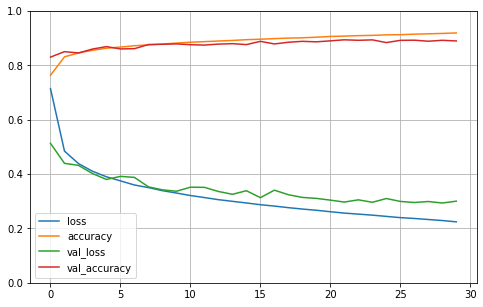

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [132]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 897us/step - loss: 64.7833 - accuracy: 0.8452


[64.78333282470703, 0.8452000021934509]

In [133]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [134]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\jh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [135]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [136]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [137]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [138]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9155 - val_loss: 0.5235
Epoch 2/20
363/363 [==============================] - 0s 494us/step - loss: 0.6593 - val_loss: 0.4735
Epoch 3/20
363/363 [==============================] - 0s 474us/step - loss: 0.4975 - val_loss: 0.4526
Epoch 4/20
363/363 [==============================] - 0s 519us/step - loss: 0.4620 - val_loss: 0.4478
Epoch 5/20
363/363 [==============================] - 0s 480us/step - loss: 0.4789 - val_loss: 0.4316
Epoch 6/20
363/363 [==============================] - 0s 520us/step - loss: 0.4453 - val_loss: 0.4178
Epoch 7/20
363/363 [==============================] - 0s 481us/step - loss: 0.4331 - val_loss: 0.4149
Epoch 8/20
363/363 [==============================] - 0s 494us/step - loss: 0.4290 - val_loss: 0.4065
Epoch 9/20
363/363 [==============================] - 0s 505us/step - loss: 0.4201 - val_loss: 0.4056
Epoch 10/20
363/363 [==============================] - 0s 477us/step - loss: 0.4124 

In [139]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

In [140]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1, activation="relu")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [141]:
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

C:\Users\jh\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 915us/step - loss: 2.2833 - val_loss: 1.0657
Epoch 2/20
363/363 [==============================] - 0s 614us/step - loss: 0.8651 - val_loss: 0.7027
Epoch 3/20
363/363 [==============================] - 0s 584us/step - loss: 0.6836 - val_loss: 0.6087
Epoch 4/20
363/363 [==============================] - 0s 611us/step - loss: 0.6219 - val_loss: 0.5706
Epoch 5/20
363/363 [==============================] - 0s 567us/step - loss: 0.5910 - val_loss: 0.5498
Epoch 6/20
363/363 [==============================] - 0s 579us/step - loss: 0.5712 - val_loss: 0.5342
Epoch 7/20
363/363 [==============================] - 0s 612us/step - loss: 0.5572 - val_loss: 0.5232
Epoch 8/20
363/363 [==============================] - 0s 618us/step - loss: 0.5454 - val_loss: 0.5153
Epoch 9/20
363/363 [==============================] - 0s 602us/step - loss: 0.5361 - val_loss: 0.5067
Epoch 10/20
363/363 [==============================] - 0s 608us/step - loss: 0.527

In [142]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs = [output,aux_output])

In [143]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9,0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8472 - main_output_loss: 0.7265 - aux_output_loss: 1.9339 - val_loss: 0.5218 - val_main_output_loss: 0.4651 - val_aux_output_loss: 1.0327
Epoch 2/20
363/363 [==============================] - 0s 766us/step - loss: 0.5379 - main_output_loss: 0.4890 - aux_output_loss: 0.9777 - val_loss: 0.5003 - val_main_output_loss: 0.4553 - val_aux_output_loss: 0.9055
Epoch 3/20
363/363 [==============================] - 0s 782us/step - loss: 0.5929 - main_output_loss: 0.5619 - aux_output_loss: 0.8720 - val_loss: 0.4792 - val_main_output_loss: 0.4385 - val_aux_output_loss: 0.8453
Epoch 4/20
363/363 [==============================] - 0s 751us/step - loss: 0.4859 - main_output_loss: 0.4505 - aux_output_loss: 0.8049 - val_loss: 0.4635 - val_main_output_loss: 0.4304 - val_aux_output_loss: 0.7614
Epoch 5/20
363/363 [==============================] - 0s 715us/step - loss: 0.4724 - main_output_loss: 0.4427 - aux_output_loss: 0.7400 - 

In [144]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 525us/step - loss: 0.3928 - main_output_loss: 0.3799 - aux_output_loss: 0.5090


In [145]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Subclassing API to Build Dynamic Models

루프를 포함하거나, 혀태가 다르거나, 조건적인 점프를 하거나, 다른 동적인 행동을 할때 사용. 명령적인 코드를 사용할때

In [146]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(sefl, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

+ input을 따로 만들 필요가 없다. 우리는 call() method를 사용하여 input 사용할수 있다. call method 안에서 루프던, 하위 단계의 텐서플로우 작동 수행 가능함.

+ 그러나 모델 구조가 call() method 안에있어서, 케라스가 쉽게 검사할수 없다. 복사와 저장도 불가. 케라스가 타입과 모양을 미리 확인할수 없어서 실수하기 쉽다. 유연함을 원하는게 아니면, 그냥 Sequential과 Functional API 사용하자

## Saving and Restoring a model

In [151]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

model.save("my_keras_model.h5")

Epoch 1/20
363/363 [==============================] - 0s 785us/step - loss: 1.6644 - val_loss: 0.5822
Epoch 2/20
363/363 [==============================] - 0s 570us/step - loss: 0.5379 - val_loss: 0.4634
Epoch 3/20
363/363 [==============================] - 0s 550us/step - loss: 0.4679 - val_loss: 0.4312
Epoch 4/20
363/363 [==============================] - 0s 560us/step - loss: 0.4440 - val_loss: 0.4146
Epoch 5/20
363/363 [==============================] - 0s 532us/step - loss: 0.4259 - val_loss: 0.3997
Epoch 6/20
363/363 [==============================] - 0s 590us/step - loss: 0.4133 - val_loss: 0.3931
Epoch 7/20
363/363 [==============================] - 0s 576us/step - loss: 0.4083 - val_loss: 0.3900
Epoch 8/20
363/363 [==============================] - 0s 558us/step - loss: 0.4137 - val_loss: 0.3917
Epoch 9/20
363/363 [==============================] - 0s 536us/step - loss: 0.3958 - val_loss: 0.3828
Epoch 10/20
363/363 [==============================] - 0s 586us/step - loss: 0.392

In [152]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks

+ dataset이 너무 커서 training이 오래 걸릴땐 checkpoint를 만들어 둔다

In [154]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 0s 424us/step - loss: 0.3681
Epoch 2/10
363/363 [==============================] - 0s 410us/step - loss: 0.3641
Epoch 3/10
363/363 [==============================] - 0s 445us/step - loss: 0.3642
Epoch 4/10
363/363 [==============================] - 0s 433us/step - loss: 0.3626
Epoch 5/10
363/363 [==============================] - 0s 436us/step - loss: 0.3596
Epoch 6/10
363/363 [==============================] - 0s 467us/step - loss: 0.3590
Epoch 7/10
363/363 [==============================] - 0s 410us/step - loss: 0.3569
Epoch 8/10
363/363 [==============================] - 0s 401us/step - loss: 0.3594
Epoch 9/10
363/363 [==============================] - 0s 406us/step - loss: 0.3549
Epoch 10/10
363/363 [==============================] - 0s 425us/step - loss: 0.3536
Epoch 1/10
363/363 [==============================] - 0s 747us/step - loss: 0.3512 - val_loss: 0.3450
Epoch 2/10
363/363 [==============================] - 0s 494us/step

In [155]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 729us/step - loss: 0.3424 - val_loss: 0.3367
Epoch 2/100
363/363 [==============================] - 0s 549us/step - loss: 0.3460 - val_loss: 0.3385
Epoch 3/100
363/363 [==============================] - 0s 543us/step - loss: 0.3405 - val_loss: 0.3412
Epoch 4/100
363/363 [==============================] - 0s 571us/step - loss: 0.3388 - val_loss: 0.3350
Epoch 5/100
363/363 [==============================] - 0s 669us/step - loss: 0.3413 - val_loss: 0.3383
Epoch 6/100
363/363 [==============================] - 0s 605us/step - loss: 0.3373 - val_loss: 0.3458
Epoch 7/100
363/363 [==============================] - 0s 575us/step - loss: 0.3364 - val_loss: 0.3325
Epoch 8/100
363/363 [==============================] - 0s 547us/step - loss: 0.3417 - val_loss: 0.3312
Epoch 9/100
363/363 [==============================] - 0s 636us/step - loss: 0.3388 - val_loss: 0.3426
Epoch 10/100
363/363 [==============================] - 0s 541us/step - l

## Fine-Tuning Neural Network Hyperparameters

우리의 케라스 모델을 scikit-learn regressor를 흉내낸 개체로 만들어보자.

아래 함수는 간단한 일변량 Sequential model(하나의 output) 이다. 

In [156]:
def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [157]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [159]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 742us/step - loss: 1.2132 - val_loss: 0.7042
Epoch 2/100
363/363 [==============================] - 0s 548us/step - loss: 0.6934 - val_loss: 0.6306
Epoch 3/100
363/363 [==============================] - 0s 571us/step - loss: 0.6311 - val_loss: 0.5853
Epoch 4/100
363/363 [==============================] - 0s 590us/step - loss: 0.5907 - val_loss: 0.5492
Epoch 5/100
363/363 [==============================] - 0s 570us/step - loss: 0.5618 - val_loss: 0.5235
Epoch 6/100
363/363 [==============================] - 0s 514us/step - loss: 0.5378 - val_loss: 0.5051
Epoch 7/100
363/363 [==============================] - 0s 561us/step - loss: 0.5215 - val_loss: 0.4916
Epoch 8/100
363/363 [==============================] - 0s 531us/step - loss: 0.5078 - val_loss: 0.4824
Epoch 9/100
363/363 [==============================] - 0s 563us/step - loss: 0.4982 - val_loss: 0.4728
Epoch 10/100
363/363 [==============================] - 0s 510us/step - l

Epoch 80/100
363/363 [==============================] - 0s 526us/step - loss: 0.3741 - val_loss: 0.3823
Epoch 81/100
363/363 [==============================] - 0s 520us/step - loss: 0.3792 - val_loss: 0.3672
Epoch 82/100
363/363 [==============================] - 0s 548us/step - loss: 0.3722 - val_loss: 0.3652
Epoch 83/100
363/363 [==============================] - 0s 556us/step - loss: 0.3751 - val_loss: 0.3645
Epoch 84/100
363/363 [==============================] - 0s 508us/step - loss: 0.3717 - val_loss: 0.3682
Epoch 85/100
363/363 [==============================] - 0s 594us/step - loss: 0.3730 - val_loss: 0.3623
Epoch 86/100
363/363 [==============================] - 0s 512us/step - loss: 0.3705 - val_loss: 0.3626
Epoch 87/100
363/363 [==============================] - 0s 537us/step - loss: 0.3727 - val_loss: 0.3617
Epoch 88/100
363/363 [==============================] - 0s 580us/step - loss: 0.3688 - val_loss: 0.3623
Epoch 89/100
363/363 [==============================] - 0s 570us

In [161]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 945us/step - loss: 0.7907 - val_loss: 0.4988
Epoch 2/100
242/242 [==============================] - 0s 562us/step - loss: 0.4869 - val_loss: 0.4667
Epoch 3/100
242/242 [==============================] - 0s 606us/step - loss: 0.4876 - val_loss: 0.4804
Epoch 4/100
242/242 [==============================] - 0s 655us/step - loss: 0.4616 - val_loss: 0.4482
Epoch 5/100
242/242 [==============================] - 0s 665us/step - loss: 0.4479 - val_loss: 0.4412
Epoch 6/100
242/242 [==============================] - 0s 596us/step - loss: 0.4508 - val_loss: 0.4410
Epoch 7/100
242/242 [==============================] - 0s 585us/step - loss: 0.4423 - val_loss: 0.4270
Epoch 8/100
242/242 [==============================] - 0s 646us/step - loss: 0.4414 - val_loss: 0.4473
Epoch 9/100
242/242 [==============================] - 0s 584us/step - loss: 0.4356 - val_loss: 0.4188
Epoch 10/100
242/242 [==============================] - 0s 634us/step - l

242/242 [==============================] - 0s 613us/step - loss: 0.4114 - val_loss: 0.4122
Epoch 31/100
242/242 [==============================] - 0s 669us/step - loss: 0.4071 - val_loss: 0.3836
Epoch 32/100
242/242 [==============================] - 0s 549us/step - loss: 0.4036 - val_loss: 0.3906
Epoch 33/100
242/242 [==============================] - 0s 586us/step - loss: 0.4059 - val_loss: 0.3809
Epoch 34/100
242/242 [==============================] - 0s 601us/step - loss: 0.4050 - val_loss: 0.3823
Epoch 35/100
242/242 [==============================] - 0s 576us/step - loss: 0.4061 - val_loss: 1.2648
Epoch 36/100
242/242 [==============================] - 0s 614us/step - loss: 0.4255 - val_loss: 0.3759
Epoch 37/100
242/242 [==============================] - 0s 604us/step - loss: 0.4013 - val_loss: 0.3811
Epoch 38/100
242/242 [==============================] - 0s 598us/step - loss: 0.3983 - val_loss: 0.3735
Epoch 39/100
242/242 [==============================] - 0s 612us/step - loss:

242/242 [==============================] - 0s 617us/step - loss: 0.3904 - val_loss: 0.3826
Epoch 38/100
242/242 [==============================] - 0s 629us/step - loss: 0.3968 - val_loss: 0.3767
Epoch 39/100
242/242 [==============================] - 0s 611us/step - loss: 0.4018 - val_loss: 0.3700
Epoch 40/100
242/242 [==============================] - 0s 588us/step - loss: 0.3911 - val_loss: 0.3643
Epoch 41/100
242/242 [==============================] - 0s 637us/step - loss: 0.3854 - val_loss: 0.3672
Epoch 42/100
242/242 [==============================] - 0s 605us/step - loss: 0.3861 - val_loss: 0.3627
Epoch 43/100
242/242 [==============================] - 0s 607us/step - loss: 0.3854 - val_loss: 0.3643
Epoch 44/100
242/242 [==============================] - 0s 569us/step - loss: 0.3894 - val_loss: 0.3703
Epoch 45/100
242/242 [==============================] - 0s 675us/step - loss: 0.3840 - val_loss: 0.3749
Epoch 46/100
242/242 [==============================] - 0s 565us/step - loss:

242/242 [==============================] - 0s 674us/step - loss: 0.3553 - val_loss: 0.3699
Epoch 55/100
242/242 [==============================] - 0s 657us/step - loss: 0.3537 - val_loss: 0.3667
Epoch 56/100
242/242 [==============================] - 0s 653us/step - loss: 0.3529 - val_loss: 0.3636
Epoch 57/100
242/242 [==============================] - 0s 613us/step - loss: 0.3511 - val_loss: 0.3623
Epoch 58/100
242/242 [==============================] - 0s 671us/step - loss: 0.3499 - val_loss: 0.3624
Epoch 59/100
242/242 [==============================] - 0s 672us/step - loss: 0.3488 - val_loss: 0.3604
Epoch 60/100
242/242 [==============================] - 0s 617us/step - loss: 0.3476 - val_loss: 0.3599
Epoch 61/100
242/242 [==============================] - 0s 700us/step - loss: 0.3468 - val_loss: 0.3588
Epoch 62/100
242/242 [==============================] - 0s 625us/step - loss: 0.3456 - val_loss: 0.3583
Epoch 63/100
242/242 [==============================] - 0s 702us/step - loss:

242/242 [==============================] - 0s 593us/step - loss: 0.3937 - val_loss: 0.3777
Epoch 33/100
242/242 [==============================] - 0s 601us/step - loss: 0.3919 - val_loss: 0.3789
Epoch 34/100
242/242 [==============================] - 0s 670us/step - loss: 0.3902 - val_loss: 0.3772
Epoch 35/100
242/242 [==============================] - 0s 633us/step - loss: 0.3888 - val_loss: 0.3744
Epoch 36/100
242/242 [==============================] - 0s 636us/step - loss: 0.3873 - val_loss: 0.3749
Epoch 37/100
242/242 [==============================] - 0s 631us/step - loss: 0.3861 - val_loss: 0.3741
Epoch 38/100
242/242 [==============================] - 0s 683us/step - loss: 0.3846 - val_loss: 0.3710
Epoch 39/100
242/242 [==============================] - 0s 603us/step - loss: 0.3825 - val_loss: 0.3706
Epoch 40/100
242/242 [==============================] - 0s 686us/step - loss: 0.3806 - val_loss: 0.3709
Epoch 41/100
242/242 [==============================] - 0s 645us/step - loss:

242/242 [==============================] - 0s 660us/step - loss: 0.4693 - val_loss: 0.4413
Epoch 11/100
242/242 [==============================] - 0s 631us/step - loss: 0.4622 - val_loss: 0.4360
Epoch 12/100
242/242 [==============================] - 0s 676us/step - loss: 0.4548 - val_loss: 0.4301
Epoch 13/100
242/242 [==============================] - 0s 702us/step - loss: 0.4489 - val_loss: 0.4260
Epoch 14/100
242/242 [==============================] - 0s 610us/step - loss: 0.4427 - val_loss: 0.4237
Epoch 15/100
242/242 [==============================] - 0s 638us/step - loss: 0.4389 - val_loss: 0.4186
Epoch 16/100
242/242 [==============================] - 0s 685us/step - loss: 0.4338 - val_loss: 0.4192
Epoch 17/100
242/242 [==============================] - 0s 691us/step - loss: 0.4302 - val_loss: 0.4135
Epoch 18/100
242/242 [==============================] - 0s 689us/step - loss: 0.4268 - val_loss: 0.4096
Epoch 19/100
242/242 [==============================] - 0s 622us/step - loss:

Epoch 89/100
242/242 [==============================] - 0s 656us/step - loss: 0.3257 - val_loss: 0.3376
Epoch 90/100
242/242 [==============================] - 0s 726us/step - loss: 0.3251 - val_loss: 0.3323
Epoch 91/100
242/242 [==============================] - 0s 710us/step - loss: 0.3248 - val_loss: 0.3331
Epoch 92/100
242/242 [==============================] - 0s 656us/step - loss: 0.3232 - val_loss: 0.3321
Epoch 93/100
242/242 [==============================] - 0s 653us/step - loss: 0.3220 - val_loss: 0.3308
Epoch 94/100
242/242 [==============================] - 0s 636us/step - loss: 0.3223 - val_loss: 0.3314
Epoch 95/100
242/242 [==============================] - 0s 698us/step - loss: 0.3206 - val_loss: 0.3331
Epoch 96/100
242/242 [==============================] - 0s 613us/step - loss: 0.3202 - val_loss: 0.3309
Epoch 97/100
242/242 [==============================] - 0s 705us/step - loss: 0.3197 - val_loss: 0.3295
Epoch 98/100
242/242 [==============================] - 0s 720us

242/242 [==============================] - 0s 578us/step - loss: 0.5178 - val_loss: 0.5034
Epoch 68/100
242/242 [==============================] - 0s 593us/step - loss: 0.5177 - val_loss: 0.5034
Epoch 69/100
242/242 [==============================] - 0s 540us/step - loss: 0.5176 - val_loss: 0.5035
Epoch 70/100
242/242 [==============================] - 0s 549us/step - loss: 0.5176 - val_loss: 0.5035
Epoch 71/100
242/242 [==============================] - 0s 567us/step - loss: 0.5175 - val_loss: 0.5033
Epoch 72/100
242/242 [==============================] - 0s 623us/step - loss: 0.5175 - val_loss: 0.5034
Epoch 73/100
242/242 [==============================] - 0s 563us/step - loss: 0.5174 - val_loss: 0.5033
Epoch 74/100
242/242 [==============================] - 0s 621us/step - loss: 0.5174 - val_loss: 0.5033
Epoch 75/100
242/242 [==============================] - 0s 638us/step - loss: 0.5173 - val_loss: 0.5033
Epoch 76/100
242/242 [==============================] - 0s 575us/step - loss:

242/242 [==============================] - 0s 583us/step - loss: 0.5818 - val_loss: 0.5428
Epoch 46/100
242/242 [==============================] - 0s 554us/step - loss: 0.5807 - val_loss: 0.5416
Epoch 47/100
242/242 [==============================] - 0s 572us/step - loss: 0.5798 - val_loss: 0.5406
Epoch 48/100
242/242 [==============================] - 0s 558us/step - loss: 0.5788 - val_loss: 0.5400
Epoch 49/100
242/242 [==============================] - 0s 568us/step - loss: 0.5779 - val_loss: 0.5390
Epoch 50/100
242/242 [==============================] - 0s 605us/step - loss: 0.5771 - val_loss: 0.5380
Epoch 51/100
242/242 [==============================] - 0s 536us/step - loss: 0.5762 - val_loss: 0.5371
Epoch 52/100
242/242 [==============================] - 0s 548us/step - loss: 0.5754 - val_loss: 0.5365
Epoch 53/100
242/242 [==============================] - 0s 574us/step - loss: 0.5745 - val_loss: 0.5359
Epoch 54/100
242/242 [==============================] - 0s 551us/step - loss:

242/242 [==============================] - 0s 547us/step - loss: 0.5968 - val_loss: 0.5642
Epoch 24/100
242/242 [==============================] - 0s 577us/step - loss: 0.5949 - val_loss: 0.5625
Epoch 25/100
242/242 [==============================] - 0s 553us/step - loss: 0.5930 - val_loss: 0.5609
Epoch 26/100
242/242 [==============================] - 0s 549us/step - loss: 0.5913 - val_loss: 0.5595
Epoch 27/100
242/242 [==============================] - 0s 574us/step - loss: 0.5897 - val_loss: 0.5581
Epoch 28/100
242/242 [==============================] - 0s 621us/step - loss: 0.5882 - val_loss: 0.5568
Epoch 29/100
242/242 [==============================] - 0s 555us/step - loss: 0.5867 - val_loss: 0.5555
Epoch 30/100
242/242 [==============================] - 0s 555us/step - loss: 0.5852 - val_loss: 0.5543
Epoch 31/100
242/242 [==============================] - 0s 595us/step - loss: 0.5839 - val_loss: 0.5530
Epoch 32/100
242/242 [==============================] - 0s 579us/step - loss:

242/242 [==============================] - 0s 879us/step - loss: 3.3081 - val_loss: 1.3055
Epoch 2/100
242/242 [==============================] - 0s 527us/step - loss: 0.9288 - val_loss: 0.6926
Epoch 3/100
242/242 [==============================] - 0s 574us/step - loss: 0.6533 - val_loss: 0.5996
Epoch 4/100
242/242 [==============================] - 0s 547us/step - loss: 0.6041 - val_loss: 0.5761
Epoch 5/100
242/242 [==============================] - 0s 610us/step - loss: 0.5874 - val_loss: 0.5643
Epoch 6/100
242/242 [==============================] - 0s 544us/step - loss: 0.5770 - val_loss: 0.5561
Epoch 7/100
242/242 [==============================] - 0s 547us/step - loss: 0.5688 - val_loss: 0.5493
Epoch 8/100
242/242 [==============================] - 0s 539us/step - loss: 0.5617 - val_loss: 0.5432
Epoch 9/100
242/242 [==============================] - 0s 619us/step - loss: 0.5556 - val_loss: 0.5378
Epoch 10/100
242/242 [==============================] - 0s 556us/step - loss: 0.5500 

242/242 [==============================] - 0s 524us/step - loss: 0.5414 - val_loss: 0.5088
Epoch 19/100
242/242 [==============================] - 0s 498us/step - loss: 0.5416 - val_loss: 0.5082
Epoch 20/100
242/242 [==============================] - 0s 555us/step - loss: 0.5393 - val_loss: 0.5051
Epoch 21/100
242/242 [==============================] - 0s 548us/step - loss: 0.5402 - val_loss: 0.5065
Epoch 22/100
242/242 [==============================] - 0s 577us/step - loss: 0.5395 - val_loss: 0.5044
Epoch 23/100
242/242 [==============================] - 0s 574us/step - loss: 0.5403 - val_loss: 0.5037
Epoch 24/100
242/242 [==============================] - 0s 583us/step - loss: 0.5400 - val_loss: 0.5035
Epoch 25/100
242/242 [==============================] - 0s 601us/step - loss: 0.5387 - val_loss: 0.5068
Epoch 26/100
242/242 [==============================] - 0s 501us/step - loss: 0.5381 - val_loss: 0.5022
Epoch 27/100
242/242 [==============================] - 0s 605us/step - loss:

242/242 [==============================] - 0s 573us/step - loss: 0.5251 - val_loss: 0.4963
Epoch 45/100
242/242 [==============================] - 0s 577us/step - loss: 0.5251 - val_loss: 0.4969
Epoch 46/100
242/242 [==============================] - 0s 577us/step - loss: 0.5247 - val_loss: 0.4977
Epoch 47/100
242/242 [==============================] - 0s 573us/step - loss: 0.5250 - val_loss: 0.4979
Epoch 48/100
242/242 [==============================] - 0s 569us/step - loss: 0.5251 - val_loss: 0.4972
Epoch 49/100
242/242 [==============================] - 0s 581us/step - loss: 0.5248 - val_loss: 0.4979
Epoch 50/100
242/242 [==============================] - 0s 585us/step - loss: 0.5247 - val_loss: 0.4963
Epoch 51/100
242/242 [==============================] - 0s 577us/step - loss: 0.5249 - val_loss: 0.4969
Epoch 52/100
242/242 [==============================] - 0s 573us/step - loss: 0.5249 - val_loss: 0.4970
Epoch 53/100
242/242 [==============================] - 0s 589us/step - loss:

242/242 [==============================] - 0s 623us/step - loss: 0.4229 - val_loss: 0.4205
Epoch 59/100
242/242 [==============================] - 0s 623us/step - loss: 0.4221 - val_loss: 0.4202
Epoch 60/100
242/242 [==============================] - 0s 618us/step - loss: 0.4215 - val_loss: 0.4198
Epoch 61/100
242/242 [==============================] - 0s 623us/step - loss: 0.4205 - val_loss: 0.4196
Epoch 62/100
242/242 [==============================] - 0s 627us/step - loss: 0.4200 - val_loss: 0.4187
Epoch 63/100
242/242 [==============================] - 0s 631us/step - loss: 0.4194 - val_loss: 0.4175
Epoch 64/100
242/242 [==============================] - 0s 618us/step - loss: 0.4189 - val_loss: 0.4169
Epoch 65/100
242/242 [==============================] - 0s 618us/step - loss: 0.4183 - val_loss: 0.4166
Epoch 66/100
242/242 [==============================] - 0s 623us/step - loss: 0.4178 - val_loss: 0.4171
Epoch 67/100
242/242 [==============================] - 0s 635us/step - loss:

242/242 [==============================] - 0s 598us/step - loss: 0.4746 - val_loss: 0.4501
Epoch 37/100
242/242 [==============================] - 0s 598us/step - loss: 0.4732 - val_loss: 0.4469
Epoch 38/100
242/242 [==============================] - 0s 593us/step - loss: 0.4715 - val_loss: 0.4452
Epoch 39/100
242/242 [==============================] - 0s 598us/step - loss: 0.4701 - val_loss: 0.4439
Epoch 40/100
242/242 [==============================] - 0s 610us/step - loss: 0.4686 - val_loss: 0.4428
Epoch 41/100
242/242 [==============================] - 0s 618us/step - loss: 0.4673 - val_loss: 0.4413
Epoch 42/100
242/242 [==============================] - 0s 618us/step - loss: 0.4660 - val_loss: 0.4402
Epoch 43/100
242/242 [==============================] - 0s 598us/step - loss: 0.4648 - val_loss: 0.4390
Epoch 44/100
242/242 [==============================] - 0s 602us/step - loss: 0.4635 - val_loss: 0.4393
Epoch 45/100
242/242 [==============================] - 0s 589us/step - loss:

242/242 [==============================] - 0s 606us/step - loss: 0.8703 - val_loss: 0.8163
Epoch 15/100
242/242 [==============================] - 0s 631us/step - loss: 0.8075 - val_loss: 0.7566
Epoch 16/100
242/242 [==============================] - 0s 664us/step - loss: 0.7556 - val_loss: 0.7095
Epoch 17/100
242/242 [==============================] - 0s 701us/step - loss: 0.7169 - val_loss: 0.6761
Epoch 18/100
242/242 [==============================] - 0s 614us/step - loss: 0.6898 - val_loss: 0.6528
Epoch 19/100
242/242 [==============================] - 0s 602us/step - loss: 0.6712 - val_loss: 0.6367
Epoch 20/100
242/242 [==============================] - 0s 627us/step - loss: 0.6581 - val_loss: 0.6249
Epoch 21/100
242/242 [==============================] - 0s 602us/step - loss: 0.6485 - val_loss: 0.6159
Epoch 22/100
242/242 [==============================] - 0s 602us/step - loss: 0.6410 - val_loss: 0.6086
Epoch 23/100
242/242 [==============================] - 0s 635us/step - loss:

Epoch 93/100
242/242 [==============================] - 0s 610us/step - loss: 0.4581 - val_loss: 0.4417
Epoch 94/100
242/242 [==============================] - 0s 598us/step - loss: 0.4576 - val_loss: 0.4407
Epoch 95/100
242/242 [==============================] - 0s 602us/step - loss: 0.4569 - val_loss: 0.4400
Epoch 96/100
242/242 [==============================] - 0s 623us/step - loss: 0.4562 - val_loss: 0.4395
Epoch 97/100
242/242 [==============================] - 0s 614us/step - loss: 0.4555 - val_loss: 0.4390
Epoch 98/100
242/242 [==============================] - 0s 606us/step - loss: 0.4550 - val_loss: 0.4383
Epoch 99/100
242/242 [==============================] - 0s 668us/step - loss: 0.4542 - val_loss: 0.4371
Epoch 100/100
121/121 [==============================] - 0s 367us/step - loss: 0.4437
Epoch 1/100
242/242 [==============================] - 0s 964us/step - loss: 1.2786 - val_loss: 1.1041
Epoch 2/100
242/242 [==============================] - 0s 566us/step - loss: 52.871

242/242 [==============================] - 0s 558us/step - loss: 0.3951 - val_loss: 0.3938
Epoch 30/100
242/242 [==============================] - 0s 649us/step - loss: 0.3935 - val_loss: 0.3927
Epoch 31/100
242/242 [==============================] - 0s 576us/step - loss: 0.3929 - val_loss: 0.3953
Epoch 32/100
242/242 [==============================] - 0s 607us/step - loss: 0.3904 - val_loss: 0.3890
Epoch 33/100
242/242 [==============================] - 0s 593us/step - loss: 0.3887 - val_loss: 0.3878
Epoch 34/100
242/242 [==============================] - 0s 654us/step - loss: 0.3902 - val_loss: 0.3879
Epoch 35/100
242/242 [==============================] - 0s 639us/step - loss: 0.3858 - val_loss: 0.3848
Epoch 36/100
242/242 [==============================] - 0s 550us/step - loss: 0.3835 - val_loss: 0.3834
Epoch 37/100
242/242 [==============================] - 0s 609us/step - loss: 0.3821 - val_loss: 0.3806
Epoch 38/100
242/242 [==============================] - 0s 585us/step - loss:

242/242 [==============================] - 0s 608us/step - loss: 0.4930 - val_loss: 0.4635
Epoch 8/100
242/242 [==============================] - 0s 596us/step - loss: 0.4823 - val_loss: 0.4562
Epoch 9/100
242/242 [==============================] - 0s 646us/step - loss: 0.4775 - val_loss: 0.4511
Epoch 10/100
242/242 [==============================] - 0s 567us/step - loss: 0.4713 - val_loss: 0.4456
Epoch 11/100
242/242 [==============================] - 0s 592us/step - loss: 0.4649 - val_loss: 0.4416
Epoch 12/100
242/242 [==============================] - 0s 602us/step - loss: 0.4600 - val_loss: 0.4381
Epoch 13/100
242/242 [==============================] - 0s 639us/step - loss: 0.4551 - val_loss: 0.4331
Epoch 14/100
242/242 [==============================] - 0s 570us/step - loss: 0.4510 - val_loss: 0.4302
Epoch 15/100
242/242 [==============================] - 0s 600us/step - loss: 0.4473 - val_loss: 0.4293
Epoch 16/100
242/242 [==============================] - 0s 608us/step - loss: 0

Epoch 86/100
242/242 [==============================] - 0s 594us/step - loss: 0.3514 - val_loss: 0.3537
Epoch 87/100
242/242 [==============================] - 0s 604us/step - loss: 0.3508 - val_loss: 0.3499
Epoch 88/100
242/242 [==============================] - 0s 589us/step - loss: 0.3488 - val_loss: 0.3478
Epoch 89/100
242/242 [==============================] - 0s 598us/step - loss: 0.3481 - val_loss: 0.3472
Epoch 90/100
242/242 [==============================] - 0s 598us/step - loss: 0.3476 - val_loss: 0.3501
Epoch 91/100
242/242 [==============================] - 0s 600us/step - loss: 0.3623 - val_loss: 0.3491
Epoch 92/100
242/242 [==============================] - 0s 593us/step - loss: 0.3479 - val_loss: 0.3570
Epoch 93/100
242/242 [==============================] - 0s 601us/step - loss: 0.3483 - val_loss: 0.3522
Epoch 94/100
242/242 [==============================] - 0s 613us/step - loss: 0.3476 - val_loss: 0.3480
Epoch 95/100
242/242 [==============================] - 0s 594us

242/242 [==============================] - 0s 595us/step - loss: 0.3676 - val_loss: 0.3579
Epoch 65/100
242/242 [==============================] - 0s 591us/step - loss: 0.3628 - val_loss: 0.3580
Epoch 66/100
242/242 [==============================] - 0s 603us/step - loss: 0.3631 - val_loss: 0.3594
Epoch 67/100
242/242 [==============================] - 0s 596us/step - loss: 0.3640 - val_loss: 0.3618
Epoch 68/100
242/242 [==============================] - 0s 588us/step - loss: 0.3626 - val_loss: 0.3629
Epoch 69/100
242/242 [==============================] - 0s 599us/step - loss: 0.3618 - val_loss: 0.3605
Epoch 70/100
242/242 [==============================] - 0s 597us/step - loss: 0.3594 - val_loss: 0.3552
Epoch 71/100
242/242 [==============================] - 0s 593us/step - loss: 0.3595 - val_loss: 0.3564
Epoch 72/100
242/242 [==============================] - 0s 609us/step - loss: 0.3673 - val_loss: 0.3622
Epoch 73/100
242/242 [==============================] - 0s 594us/step - loss:

242/242 [==============================] - 0s 600us/step - loss: 0.4139 - val_loss: 0.4118
Epoch 43/100
242/242 [==============================] - 0s 592us/step - loss: 0.4138 - val_loss: 0.4117
Epoch 44/100
242/242 [==============================] - 0s 598us/step - loss: 0.4116 - val_loss: 0.4092
Epoch 45/100
242/242 [==============================] - 0s 600us/step - loss: 0.4111 - val_loss: 0.4093
Epoch 46/100
242/242 [==============================] - 0s 602us/step - loss: 0.4093 - val_loss: 0.4082
Epoch 47/100
242/242 [==============================] - 0s 592us/step - loss: 0.4082 - val_loss: 0.4075
Epoch 48/100
242/242 [==============================] - 0s 595us/step - loss: 0.4067 - val_loss: 0.4069
Epoch 49/100
242/242 [==============================] - 0s 596us/step - loss: 0.4058 - val_loss: 0.4058
Epoch 50/100
242/242 [==============================] - 0s 598us/step - loss: 0.4050 - val_loss: 0.4038
Epoch 51/100
242/242 [==============================] - 0s 602us/step - loss:

242/242 [==============================] - 0s 606us/step - loss: 0.4758 - val_loss: 0.4528
Epoch 21/100
242/242 [==============================] - 0s 647us/step - loss: 0.4745 - val_loss: 0.4492
Epoch 22/100
242/242 [==============================] - 0s 664us/step - loss: 0.4699 - val_loss: 0.4473
Epoch 23/100
242/242 [==============================] - 0s 527us/step - loss: 0.4686 - val_loss: 0.4453
Epoch 24/100
242/242 [==============================] - 0s 559us/step - loss: 0.4670 - val_loss: 0.4430
Epoch 25/100
242/242 [==============================] - 0s 567us/step - loss: 0.4638 - val_loss: 0.4409
Epoch 26/100
242/242 [==============================] - 0s 559us/step - loss: 0.4617 - val_loss: 0.4399
Epoch 27/100
242/242 [==============================] - 0s 709us/step - loss: 0.4604 - val_loss: 0.4396
Epoch 28/100
242/242 [==============================] - 0s 593us/step - loss: 0.4596 - val_loss: 0.4394
Epoch 29/100
242/242 [==============================] - 0s 573us/step - loss:

Epoch 99/100
242/242 [==============================] - 0s 586us/step - loss: 0.3996 - val_loss: 0.3885
Epoch 100/100
121/121 [==============================] - 0s 318us/step - loss: 0.3893
Epoch 1/100
242/242 [==============================] - 0s 927us/step - loss: 1.7532 - val_loss: 0.7760
Epoch 2/100
242/242 [==============================] - 0s 610us/step - loss: 0.7534 - val_loss: 0.6828
Epoch 3/100
242/242 [==============================] - 0s 579us/step - loss: 0.6898 - val_loss: 0.6381
Epoch 4/100
242/242 [==============================] - 0s 709us/step - loss: 0.6483 - val_loss: 0.6007
Epoch 5/100
242/242 [==============================] - 0s 632us/step - loss: 0.6139 - val_loss: 0.5713
Epoch 6/100
242/242 [==============================] - 0s 661us/step - loss: 0.5868 - val_loss: 0.5487
Epoch 7/100
242/242 [==============================] - 0s 655us/step - loss: 0.5648 - val_loss: 0.5289
Epoch 8/100
242/242 [==============================] - 0s 582us/step - loss: 0.5473 - val

242/242 [==============================] - 0s 604us/step - loss: 0.3905 - val_loss: 0.3806
Epoch 78/100
242/242 [==============================] - 0s 601us/step - loss: 0.3897 - val_loss: 0.3798
Epoch 79/100
242/242 [==============================] - 0s 608us/step - loss: 0.3888 - val_loss: 0.3790
Epoch 80/100
242/242 [==============================] - 0s 589us/step - loss: 0.3881 - val_loss: 0.3783
Epoch 81/100
242/242 [==============================] - 0s 599us/step - loss: 0.3876 - val_loss: 0.3785
Epoch 82/100
242/242 [==============================] - 0s 556us/step - loss: 0.3873 - val_loss: 0.3770
Epoch 83/100
242/242 [==============================] - 0s 592us/step - loss: 0.3863 - val_loss: 0.3773
Epoch 84/100
242/242 [==============================] - 0s 605us/step - loss: 0.3872 - val_loss: 0.3765
Epoch 85/100
242/242 [==============================] - 0s 597us/step - loss: 0.3859 - val_loss: 0.3763
Epoch 86/100
242/242 [==============================] - 0s 611us/step - loss:

242/242 [==============================] - 0s 491us/step - loss: 0.5298 - val_loss: 0.5195
Epoch 56/100
242/242 [==============================] - 0s 549us/step - loss: 0.5292 - val_loss: 0.5187
Epoch 57/100
242/242 [==============================] - 0s 564us/step - loss: 0.5284 - val_loss: 0.5177
Epoch 58/100
242/242 [==============================] - 0s 495us/step - loss: 0.5280 - val_loss: 0.5169
Epoch 59/100
242/242 [==============================] - 0s 543us/step - loss: 0.5275 - val_loss: 0.5181
Epoch 60/100
242/242 [==============================] - 0s 540us/step - loss: 0.5270 - val_loss: 0.5181
Epoch 61/100
242/242 [==============================] - 0s 551us/step - loss: 0.5264 - val_loss: 0.5169
Epoch 62/100
242/242 [==============================] - 0s 489us/step - loss: 0.5259 - val_loss: 0.5159
Epoch 63/100
242/242 [==============================] - 0s 548us/step - loss: 0.5254 - val_loss: 0.5146
Epoch 64/100
242/242 [==============================] - 0s 489us/step - loss:

242/242 [==============================] - 0s 555us/step - loss: 0.5598 - val_loss: 0.5224
Epoch 34/100
242/242 [==============================] - 0s 583us/step - loss: 0.5587 - val_loss: 0.5204
Epoch 35/100
242/242 [==============================] - 0s 563us/step - loss: 0.5570 - val_loss: 0.5197
Epoch 36/100
242/242 [==============================] - 0s 559us/step - loss: 0.5556 - val_loss: 0.5191
Epoch 37/100
242/242 [==============================] - 0s 500us/step - loss: 0.5550 - val_loss: 0.5176
Epoch 38/100
242/242 [==============================] - 0s 556us/step - loss: 0.5538 - val_loss: 0.5164
Epoch 39/100
242/242 [==============================] - 0s 498us/step - loss: 0.5526 - val_loss: 0.5157
Epoch 40/100
242/242 [==============================] - 0s 549us/step - loss: 0.5519 - val_loss: 0.5146
Epoch 41/100
242/242 [==============================] - 0s 507us/step - loss: 0.5507 - val_loss: 0.5142
Epoch 42/100
242/242 [==============================] - 0s 559us/step - loss:

242/242 [==============================] - 0s 562us/step - loss: 0.5593 - val_loss: 0.5277
Epoch 12/100
242/242 [==============================] - 0s 558us/step - loss: 0.5569 - val_loss: 0.5257
Epoch 13/100
242/242 [==============================] - 0s 592us/step - loss: 0.5548 - val_loss: 0.5240
Epoch 14/100
242/242 [==============================] - 0s 559us/step - loss: 0.5527 - val_loss: 0.5220
Epoch 15/100
242/242 [==============================] - 0s 496us/step - loss: 0.5510 - val_loss: 0.5203
Epoch 16/100
242/242 [==============================] - 0s 490us/step - loss: 0.5491 - val_loss: 0.5191
Epoch 17/100
242/242 [==============================] - 0s 556us/step - loss: 0.5479 - val_loss: 0.5178
Epoch 18/100
242/242 [==============================] - 0s 562us/step - loss: 0.5464 - val_loss: 0.5165
Epoch 19/100
242/242 [==============================] - 0s 560us/step - loss: 0.5450 - val_loss: 0.5152
Epoch 20/100
242/242 [==============================] - 0s 563us/step - loss:

Epoch 90/100
242/242 [==============================] - 0s 504us/step - loss: 0.5245 - val_loss: 0.4967
Epoch 91/100
242/242 [==============================] - 0s 498us/step - loss: 0.5241 - val_loss: 0.4968
Epoch 92/100
242/242 [==============================] - 0s 547us/step - loss: 0.5244 - val_loss: 0.4970
Epoch 93/100
242/242 [==============================] - 0s 559us/step - loss: 0.5244 - val_loss: 0.4971
Epoch 94/100
242/242 [==============================] - 0s 593us/step - loss: 0.5245 - val_loss: 0.4971
Epoch 95/100
242/242 [==============================] - 0s 561us/step - loss: 0.5243 - val_loss: 0.4973
Epoch 96/100
242/242 [==============================] - 0s 559us/step - loss: 0.5244 - val_loss: 0.4968
Epoch 97/100
242/242 [==============================] - 0s 575us/step - loss: 0.5244 - val_loss: 0.4967
Epoch 98/100
242/242 [==============================] - 0s 560us/step - loss: 0.5240 - val_loss: 0.4966
Epoch 99/100
242/242 [==============================] - 0s 560us

242/242 [==============================] - 0s 617us/step - loss: 0.3102 - val_loss: 0.3158
Epoch 22/100
242/242 [==============================] - 0s 661us/step - loss: 0.3201 - val_loss: 0.3983
Epoch 23/100
242/242 [==============================] - 0s 654us/step - loss: 0.3157 - val_loss: 0.3117
Epoch 24/100
242/242 [==============================] - 0s 658us/step - loss: 0.3052 - val_loss: 0.3115
Epoch 25/100
242/242 [==============================] - 0s 585us/step - loss: 0.3029 - val_loss: 0.3038
Epoch 26/100
242/242 [==============================] - 0s 641us/step - loss: 0.3011 - val_loss: 0.3349
Epoch 27/100
242/242 [==============================] - 0s 652us/step - loss: 0.2984 - val_loss: 0.3361
Epoch 28/100
242/242 [==============================] - 0s 590us/step - loss: 0.3022 - val_loss: 0.3122
Epoch 29/100
242/242 [==============================] - 0s 573us/step - loss: 0.2988 - val_loss: 0.3286
Epoch 30/100
242/242 [==============================] - 0s 638us/step - loss:

363/363 [==============================] - 0s 598us/step - loss: 0.3572 - val_loss: 0.3543
Epoch 41/100
363/363 [==============================] - 0s 598us/step - loss: 0.3589 - val_loss: 0.3532
Epoch 42/100
363/363 [==============================] - 0s 604us/step - loss: 0.3538 - val_loss: 0.3499
Epoch 43/100
363/363 [==============================] - 0s 579us/step - loss: 0.3530 - val_loss: 0.3492
Epoch 44/100
363/363 [==============================] - 0s 584us/step - loss: 0.3502 - val_loss: 0.3484
Epoch 45/100
363/363 [==============================] - 0s 589us/step - loss: 0.3496 - val_loss: 0.3462
Epoch 46/100
363/363 [==============================] - 0s 587us/step - loss: 0.3485 - val_loss: 0.3454
Epoch 47/100
363/363 [==============================] - 0s 590us/step - loss: 0.3466 - val_loss: 0.3439
Epoch 48/100
363/363 [==============================] - 0s 591us/step - loss: 0.3473 - val_loss: 0.3437
Epoch 49/100
363/363 [==============================] - 0s 595us/step - loss:

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001B1C9D77520>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B1B19507F0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [163]:
rnd_search_cv.best_params_

{'learning_rate': 0.0023048648388561033, 'n_hidden': 2, 'n_neurons': 51}

In [164]:
rnd_search_cv.best_score_

-0.3349065085252126

In [166]:
model = rnd_search_cv.best_estimator_.model